In [1]:
from sklearn import tree#决策树算法包
from sklearn.datasets import load_wine#红酒数据加载
from sklearn.model_selection import train_test_split#数据分割方法
import pandas as pd

In [2]:
# 设置种子
# def set_seed(seed=2021):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)

In [3]:
wine=load_wine()#下载红酒数据

In [4]:
wine.data#看特征数据

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target#看标签数据

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.data.shape#看数据维度

(178, 13)

In [7]:
wine.feature_names#看特征

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names#看标签

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
#将数据联立起来构造表格

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0


In [10]:
# Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3,random_state =23)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3,random_state =23)
#设置随机数字生成器的种子使神经网络随机数不变，结果不变
#30%作测试集
# random_state保证程序每次运行都分割一样的训练集和测试集
data = pd.DataFrame(Xtrain, columns= wine.feature_names)
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,13.001048,2.305887,2.368871,19.477419,99.379032,2.266210,1.997742,0.364919,1.576774,5.001935,0.945048,2.592984,743.387097
std,0.805491,1.112749,0.266928,3.301215,13.397969,0.605184,0.984171,0.124929,0.565557,2.270159,0.226446,0.724822,301.627124
min,11.030000,0.740000,1.700000,11.200000,78.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.607500,2.210000,17.350000,88.750000,1.680000,1.175000,0.267500,1.250000,3.240000,0.750000,1.912500,513.750000
50%,13.050000,1.820000,2.355000,19.050000,97.000000,2.400000,2.170000,0.340000,1.540000,4.600000,0.955000,2.795000,673.500000
75%,13.622500,3.000000,2.565000,21.500000,106.000000,2.742500,2.760000,0.442500,1.950000,6.032500,1.092500,3.160000,996.250000
max,14.830000,5.800000,3.230000,30.000000,139.000000,3.520000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1515.000000


In [11]:
Xtrain.shape

(124, 13)

In [12]:
Xtest.shape

(54, 13)

In [13]:
from sklearn.metrics import classification_report

In [14]:
clf = tree.DecisionTreeClassifier(criterion = "entropy",random_state=23)
clf = clf.fit(Xtrain, Ytrain)
# print(confusion_matrix(Ytest.reshape(-1,1), clf.predict(Xtest).reshape(-1,1)))
score = clf.score(Xtest, Ytest) #返回预测的准确度accuracy
score

1.0

In [15]:
feature_name=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类类酚类','花青素',
              '颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
class_name=['琴酒','雪莉','贝尔摩德']

In [16]:
from sklearn.tree import plot_tree#导入决策树图像包
import matplotlib.pylab as plt#导入绘图库
import numpy as np

In [17]:
#plt.rcParams['figure.figsize'] =(20.0, 10.0)#设置图像大小
#plot_tree(clf,feature_names = feature_name ,class_names = class_name,filled = True)#中文字符无法显示

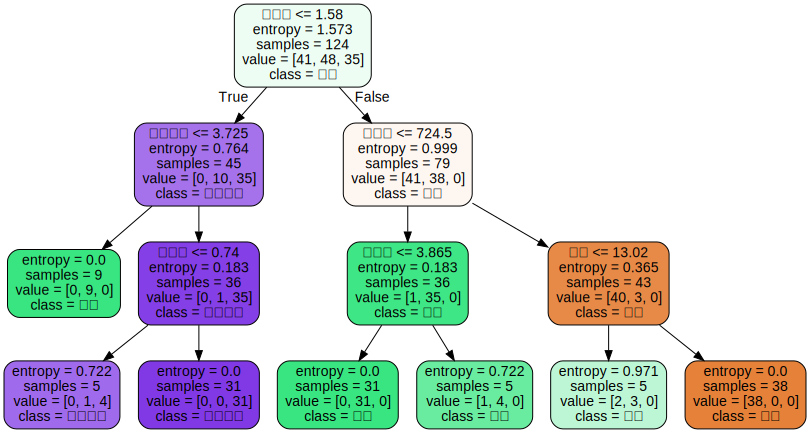

In [56]:
import graphviz#使用conda install下载的graphviz和python-graphviz，使得决策树出现中显示中文
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = class_name
                                ,filled = True     #填充颜色
                                ,rounded = True    #画出圆角方块，
                               )
graph = graphviz.Source(dot_data)
graph

In [60]:
# # 导出 titanic.dot 文件
# with open("dot_data.dot", 'w') as f:
# #     f = tree.export_graphviz(clf,feature_names = feature_name
#                                 ,class_names = class_name
#                                 ,filled = True     #填充颜色
#                                 ,rounded = True    #画出圆角方块，
#                              ,out_file=f)

In [46]:
# from graphviz import Digraph
# dot_data = Digraph(name="MyPicture", comment="the test", format="jpg")
# dot_data.render(filename='MyPicture',view=True)

'MyPicture.jpg'

In [19]:
clf.feature_importances_

array([0.01412346, 0.        , 0.        , 0.05347088, 0.        ,
       0.        , 0.41911004, 0.        , 0.        , 0.22298121,
       0.        , 0.        , 0.29031441])

In [20]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.014123456026289812),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.05347087817022259),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4191100398785887),
 ('非黄烷类类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.22298121399544787),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.29031441192945096)]

In [21]:
from sklearn.model_selection import cross_val_score#引入交叉验证方法（用于比较得到最优划分方法
#sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’)
#estimator： 需要使用交叉验证的算法，X： 输入样本数据，y： 样本标签

In [22]:
clf =tree.DecisionTreeClassifier(criterion = 'gini',random_state =23)#,random_state =23
clf=clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest, Ytest) 
# score = cross_val_score(clf,Xtest,Ytest,cv=10).mean()#设置cv： 交叉验证折数或可迭代的次数，
print('基尼系数的准确度: %.4f'%score)
clf =tree.DecisionTreeClassifier(criterion = 'entropy',random_state =23)#,random_state =23
clf=clf.fit(Xtrain,Ytrain)
score= clf.score(Xtest, Ytest) 
# score = cross_val_score(clf,Xtest,Ytest,cv=10).mean()#mean函数计算平均值
print('信息熵的准确度: %.4f'%score)

基尼系数的准确度: 0.9815
信息熵的准确度: 1.0000


[0.5740740740740741, 0.9629629629629629, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


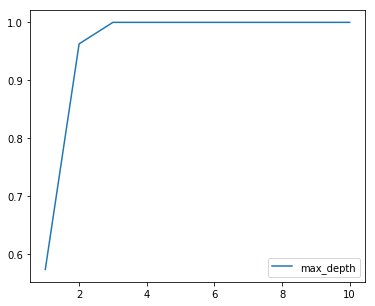

In [23]:
a= []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = i+1, random_state=23)#树的深度不能为1所以从2开始
    clf=clf.fit(Xtrain,Ytrain)#训练模型
    score = clf.score(Xtest,Ytest)
    a.append(score)
    #a.append([i,score])
#a= np.array(a)
print(a)
#max_score = np.where(a==np.max(a[:,1]))[0][0] #找出最高得分对应的i
#print("最优参数和最高得分:",a[max_score]) 
#max_score = max(a[:,1]) #找出最高得分对应的i
#print("最优参数和最高得分:",max_score)  
plt.figure(figsize=[6,5])
plt.plot(range(1,11),a,label='max_depth')
plt.legend()
plt.show()

[0.9814814814814815, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9629629629629629, 0.9259259259259259, 0.9074074074074074, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


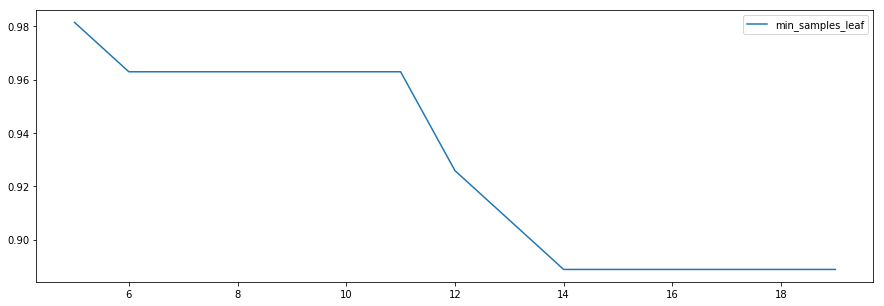

In [24]:
b= []
for i in range(5,20):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth =4,min_samples_leaf = i, random_state=23)
    clf=clf.fit(Xtrain,Ytrain)#训练模型
    score = clf.score(Xtest,Ytest)
    b.append(score)
    #b.append([i,score])
#b= np.array(b)
print(b)
#max_score = max(b[:,1]) #找出最高得分对应的i
#print("最优参数和最高得分:",max_score)  
plt.figure(figsize=[15,5])
#plt.plot(b[:,0],b[:,1])
plt.plot(range(5,20),b,label='min_samples_leaf')
plt.legend()
plt.show()

[0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815, 0.9814814814814815]


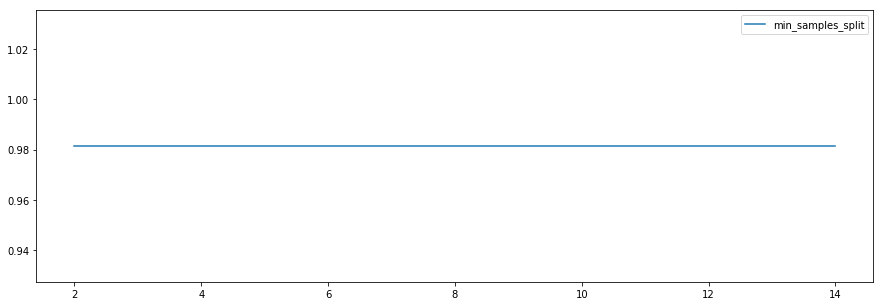

In [25]:
c= []
for i in range(2,15):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,
                                      min_samples_leaf = 5,min_samples_split = i,
                                      random_state =23)
    clf=clf.fit(Xtrain,Ytrain)#训练模型
    score = clf.score(Xtest,Ytest)
    c.append(score)
    #c.append([i,score])
#c= np.array(c)
print(c)
#max_score = np.where(c==np.max(c[:,1]))[0][0] #找出最高得分对应的i
#print("最优参数和最高得分:",c[max_score])  
plt.figure(figsize=[15,5])
#plt.plot(c[:,0],c[:,1])
plt.plot(range(2,15),c,label='min_samples_split')
plt.legend()
plt.show()

[Text(357.077,386.645,'X[6] <= 1.58\nentropy = 1.573\nsamples = 124\nvalue = [41, 48, 35]'),
 Text(129.846,276.175,'X[9] <= 3.725\nentropy = 0.764\nsamples = 45\nvalue = [0, 10, 35]'),
 Text(64.9231,165.705,'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(194.769,165.705,'X[8] <= 0.74\nentropy = 0.183\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(129.846,55.235,'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(259.692,55.235,'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]'),
 Text(584.308,276.175,'X[12] <= 724.5\nentropy = 0.999\nsamples = 79\nvalue = [41, 38, 0]'),
 Text(454.462,165.705,'X[1] <= 3.865\nentropy = 0.183\nsamples = 36\nvalue = [1, 35, 0]'),
 Text(389.538,55.235,'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(519.385,55.235,'entropy = 0.722\nsamples = 5\nvalue = [1, 4, 0]'),
 Text(714.154,165.705,'X[0] <= 13.02\nentropy = 0.365\nsamples = 43\nvalue = [40, 3, 0]'),
 Text(649.231,55.235,'entropy = 0.971\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(779.077

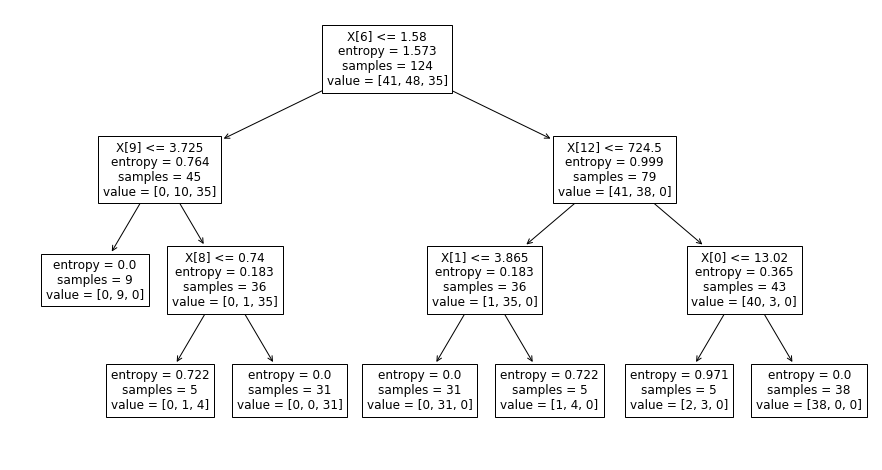

In [26]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth = 4,
                                  random_state=23,min_samples_leaf =5,
                                  min_samples_split =2)
clf=clf.fit(Xtrain,Ytrain)
plt.rcParams['figure.figsize'] = (15.0, 8.0)#设置图像大小
plot_tree(clf) 

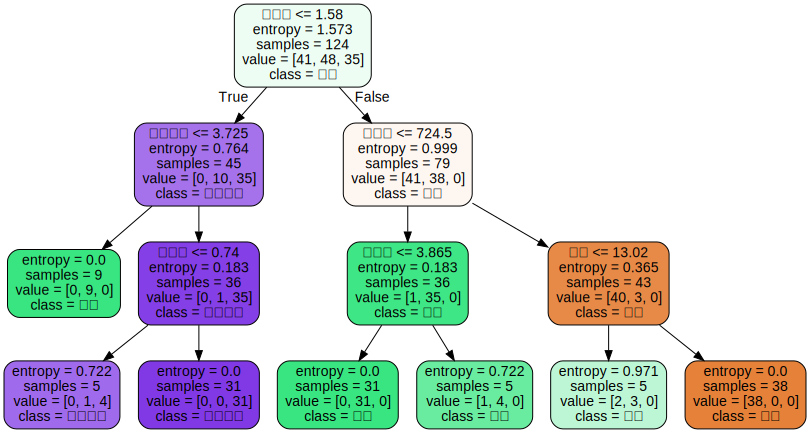

In [27]:
dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = class_name
                                ,filled = True   #填充颜色
                                ,rounded = True    #画出圆角方块
                               )
graph = graphviz.Source(dot_data)
graph

In [28]:
score=clf.score(Xtest,Ytest)
score

0.9814814814814815

In [29]:
#特征分析
clf.feature_importances_

array([0.05925461, 0.01630067, 0.        , 0.        , 0.        ,
       0.        , 0.4467647 , 0.        , 0.01630067, 0.15190877,
       0.        , 0.        , 0.30947059])

In [30]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.05925461033375895),
 ('苹果酸', 0.01630066553073838),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.4467647020837911),
 ('非黄烷类类酚类', 0.0),
 ('花青素', 0.01630066553073838),
 ('颜色强度', 0.1519087654707911),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.309470591050182)]

In [31]:
import sklearn
print(sklearn.__version__)#查看sklern 版本，0.21以上才有plot_tree命令，通过conda install scikit-learn=0.23.1命令更新

0.23.1
